**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1507575962&Signature=HUgKXCr3TOJMcb%2BGgbwFR4HGS7joOdSr0aO49X4453i2Y4LPFC2imccd%2BS2bzYMtUOqZSRW%2FNOGTwv5hI07%2FvXdFrgnnlyMz1l548aLi0Otg0jzIa11YXymXX4801QaoQmhMJV6ko0ycMJx5y00zSn8lOFNxVARz3aNNl6L8GKkodLITzAy72uPyCXS1iMuPFbmxdVbhYaO6OiKYh%2BDx%2Ftf2z9w3KSm5OGZacRcoxuYCnpZL6PpbG67hzaF21Vh9%2FV%2BrgEoEI0cL%2BKvwIUo5GcTGu0jmsixFx5JyHFZba6l5gDNRlT%2BIHEpjFAtHHrMEdTSzzlWSR2cEqig5WBsmXg%3D%3D) at the kaggle website! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [2]:
housing_data = pd.read_csv('../data/train.csv', index_col='Id')

In [3]:
housing_data.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
893           20       RL         70.0     8414   Pave   NaN      Reg   
1106          60       RL         98.0    12256   Pave   NaN      IR1   
414           30       RM         56.0     8960   Pave  Grvl      Reg   
523           50       RM         50.0     5000   Pave   NaN      Reg   
1037          20       RL         89.0    12898   Pave   NaN      IR1   

     LandContour Utilities LotConfig    ...     PoolArea PoolQC  Fence  \
Id                                      ...                              
893          Lvl    AllPub    Inside    ...            0    NaN  MnPrv   
1106         Lvl    AllPub    Corner    ...            0    NaN    NaN   
414          Lvl    AllPub    Inside    ...            0    NaN    NaN   
523          Lvl    AllPub    Corner    ...            0    NaN    NaN   
1037         HLS    AllPub    Inside    ...            0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                                           
893          NaN       0      2    2006        WD         Normal     154500  
1106         NaN       0      4    2010        WD         Normal     325000  
414          NaN       0      3    2010        WD         Normal     115000  
523          NaN       0     10    2006        WD         Normal     159000  
1037         NaN       0      9    2009        WD         Normal     315500  

[5 rows x 80 columns]

In [4]:
housing_data.shape

(1460, 80)

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [5]:
# You could also have gotten the shape of the data from the description on Kaggle
!wc -l ../data/train.csv

1461 ../data/train.csv


In [6]:
assert housing_data.shape == (1460, 80)

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [7]:
# MSSubClass is categorical but encoded as numeric. Convert to dtype object.
housing_data['MSSubClass'] = housing_data['MSSubClass'].astype('object')

### B. Plot histograms of the numeric columns. 

In [8]:
categorical_cols = housing_data.select_dtypes(['object']).columns
numeric_cols = housing_data.select_dtypes(exclude=['object']).columns

In [9]:
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


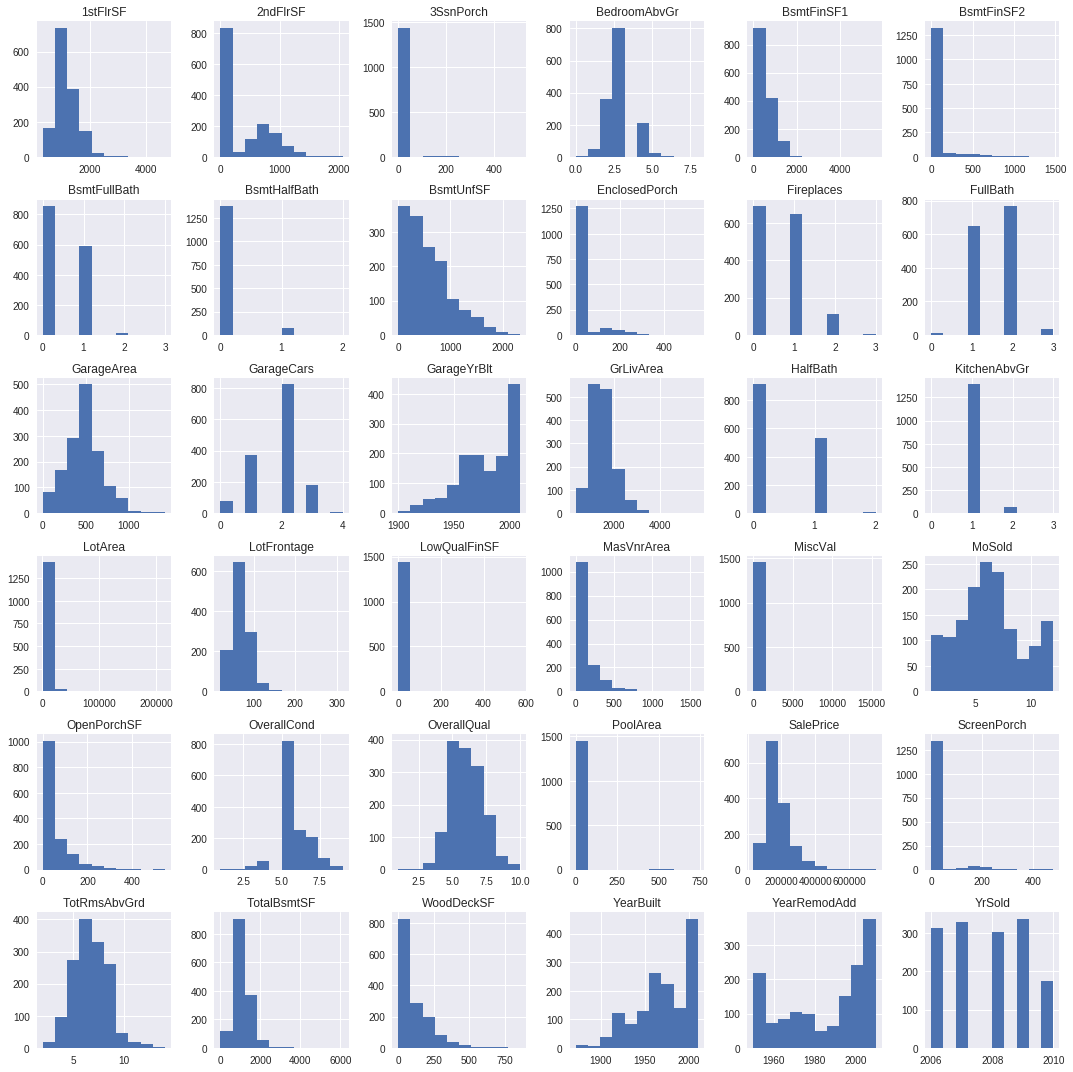

In [11]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
housing_data[numeric_cols].hist(ax=ax)
fig.tight_layout()
fig.show()

#### What are your observations? Add them to this markdown cell.

---

In this dataset, there are 36 relevant numeric features. There is also the `Id` column, which is the unique id of each property and should have no predictive power in our models. 

There are a few classes of numerical features:
* Square Footage
  * There are a number of feqtures that indicate the square footage of different features, such as the first floor, second floor, basement, and different room finishes. These are continuous values that represent square footage. 
* Time
  * These features represent different time features. For example, when was the home built? Sold? Remodeled? How old is the garage?
  * There may be some interesting feature engineering to take care of here. We can use the year sold and year remodeled to figure out the age of different remodels. 
* Rooms and Ammenities 
  * These features represent data such as how many fireplaces? Kitchens? Bathrooms? How many cars in the garage?
* Condition and Quality
  * These are subjective features that are determined by surveyors, 10 being high and 1 being low.
  
Next, let's visualize how each of these features covary with price.

### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


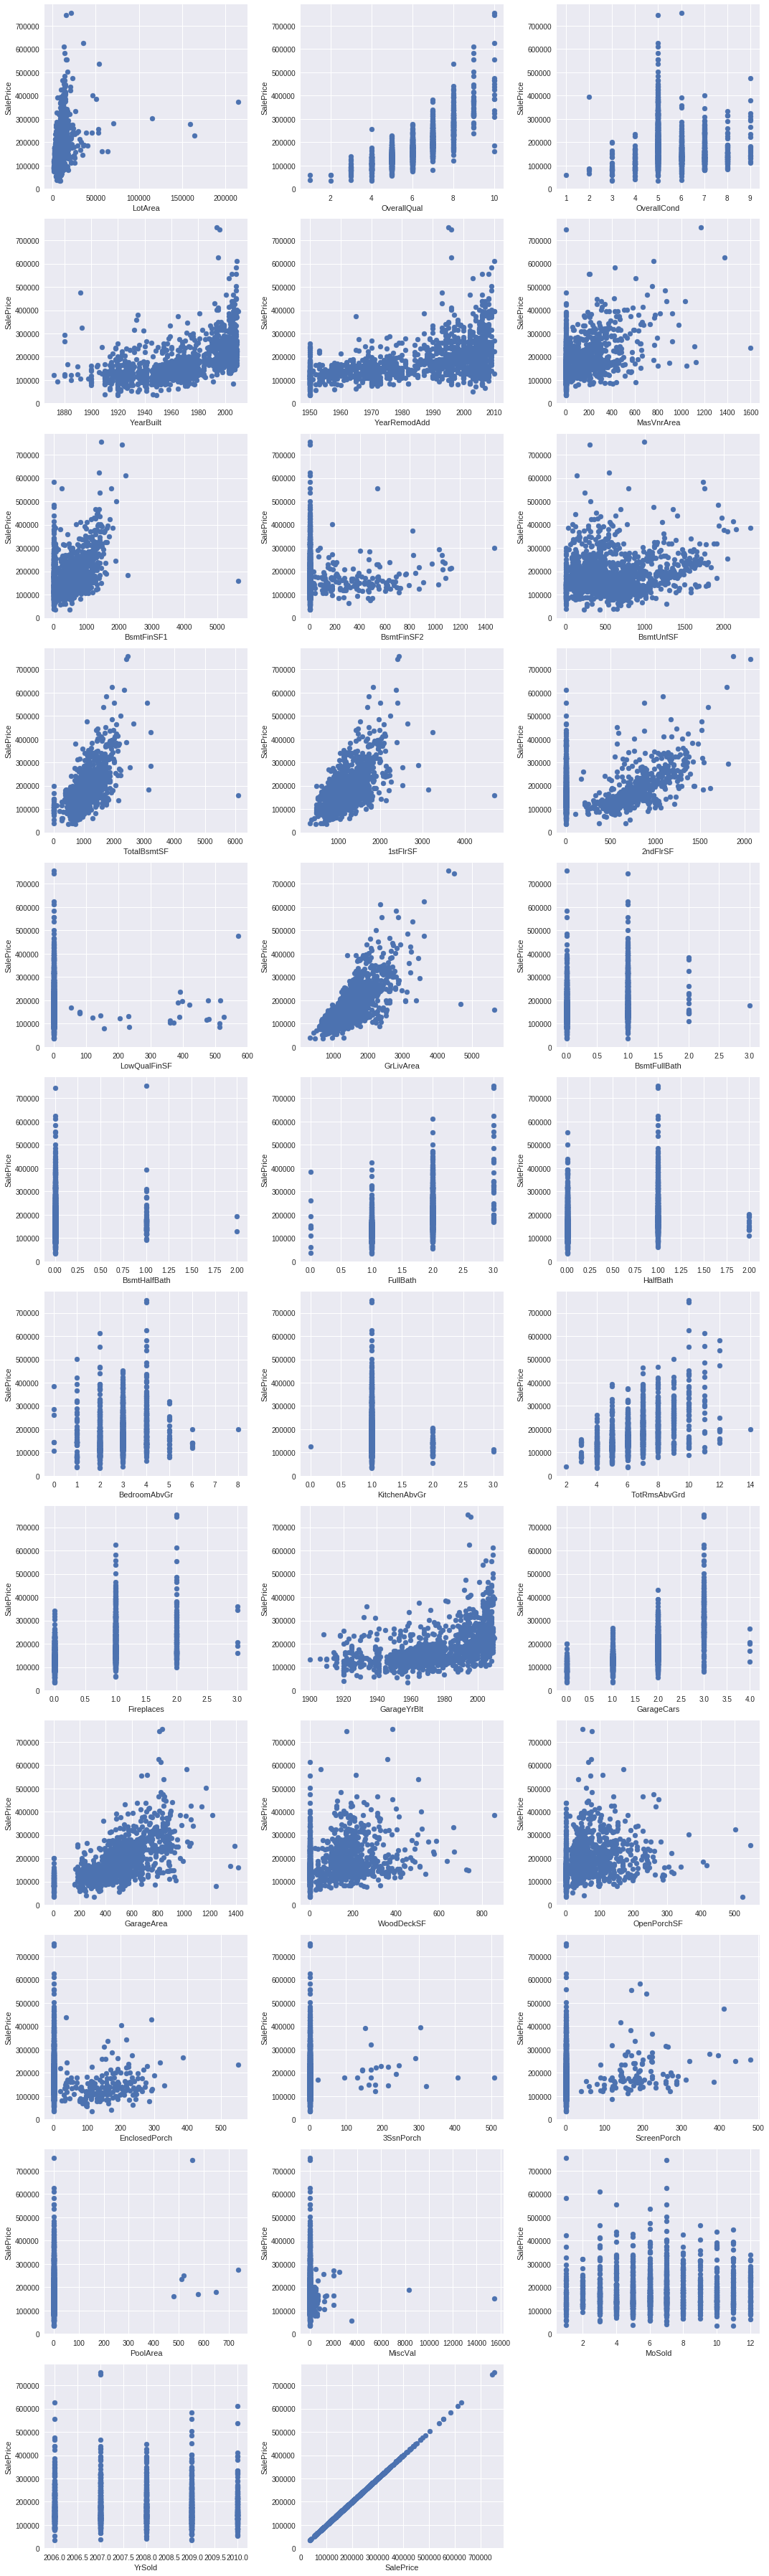

In [12]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_cols[1:]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(housing_data[col], housing_data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show()

#### What are your observations? Add them to this markdown cell.

---

For the numerical features, if they have an effect on sale price, we should see some sort of correlation with sale price. Many features don't seem to have a strong relationship with price. For example, the year sold doesn't seem to have a strong effect on SalePrice. Let's confirm that with a groupby and plot: 

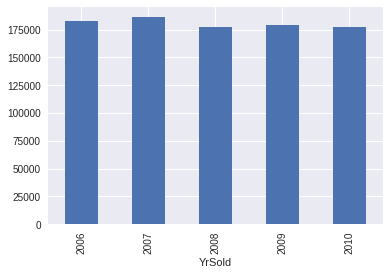

In [13]:
housing_data.groupby('YrSold').mean()['SalePrice'].plot.bar()

However, there are some features that seem to strongly covary with a home's sale price. A few examples include the overall quality, lot square footage, and number of rooms above ground. It seems like there are many numerical features we could use to predict the price of a house. Now let's check out some categorical features!

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


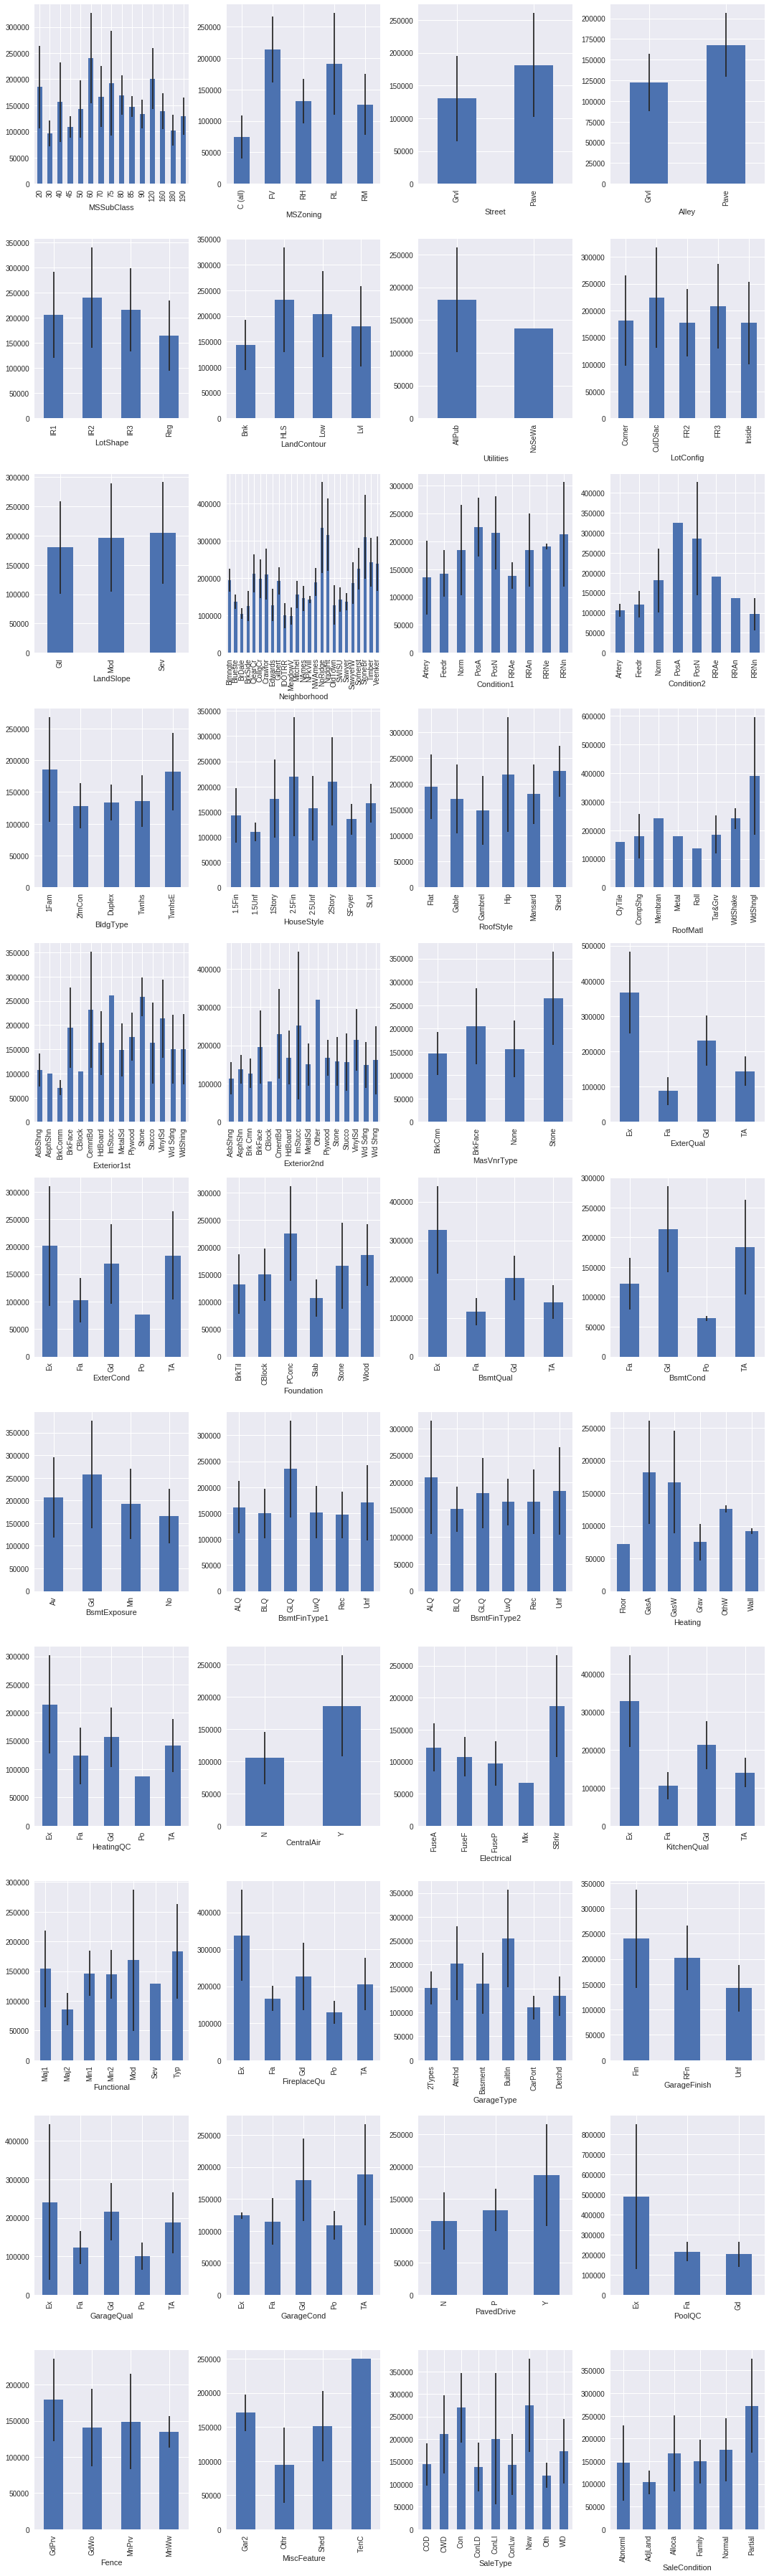

In [14]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(categorical_cols):
    fig.add_subplot(11,4,1+i)
    housing_data.groupby(col).mean()['SalePrice'].plot.bar(yerr = housing_data.groupby(col).std())
fig.tight_layout()
fig.show()

#### What are your observations? Add them to this markdown cell.

---

Similarly to the numeric features, there is a range of categorical features. While many look like the sale price varies with category, there are many that don't. Let's identify a few features that affect value. Some include the presence or absence of central air, the neighborhood, the external quality, and the zoning. 

There are also features that don't vary in price a lot among different categories, including the roof style and land slope. 

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [15]:
lower_quartile = housing_data.SalePrice.quantile(.25)
upper_quartile = housing_data.SalePrice.quantile(.75)
iqr = upper_quartile - lower_quartile
upper_bound = housing_data.SalePrice.mean() + 3 * iqr
lower_bound = housing_data.SalePrice.mean() - 3 * iqr

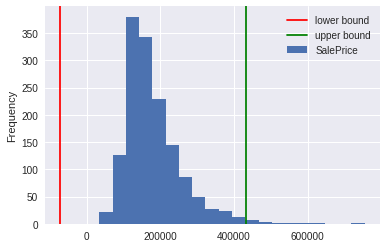

In [16]:
housing_data.SalePrice.plot.hist(bins=20)
plt.axvline(lower_bound, color = 'r', label = 'lower bound')
plt.axvline(upper_bound, color = 'g', label = 'upper bound')
plt.legend()
plt.show()

We decided to use 3 \* the IQR, because 1.5 * IQR was cutting out too much of the data. The lower bound doesn't matter because it seems that all the outliers are in the upper tail. This distribution is positively skewed, so outliers will all be high-priced homes.

In [17]:
outlier_mask = (housing_data.SalePrice > lower_bound) & (housing_data.SalePrice < upper_bound)

housing_tukey_df = housing_data[outlier_mask]

In [18]:
housing_data.shape

(1460, 80)

In [19]:
housing_tukey_df.shape

(1442, 80)

In [20]:
print('{} homes were identified as outliers.'.format(housing_data.shape[0] - housing_tukey_df.shape[0]))

18 homes were identified as outliers.


### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1507575962&Signature=HUgKXCr3TOJMcb%2BGgbwFR4HGS7joOdSr0aO49X4453i2Y4LPFC2imccd%2BS2bzYMtUOqZSRW%2FNOGTwv5hI07%2FvXdFrgnnlyMz1l548aLi0Otg0jzIa11YXymXX4801QaoQmhMJV6ko0ycMJx5y00zSn8lOFNxVARz3aNNl6L8GKkodLITzAy72uPyCXS1iMuPFbmxdVbhYaO6OiKYh%2BDx%2Ftf2z9w3KSm5OGZacRcoxuYCnpZL6PpbG67hzaF21Vh9%2FV%2BrgEoEI0cL%2BKvwIUo5GcTGu0jmsixFx5JyHFZba6l5gDNRlT%2BIHEpjFAtHHrMEdTSzzlWSR2cEqig5WBsmXg%3D%3D) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

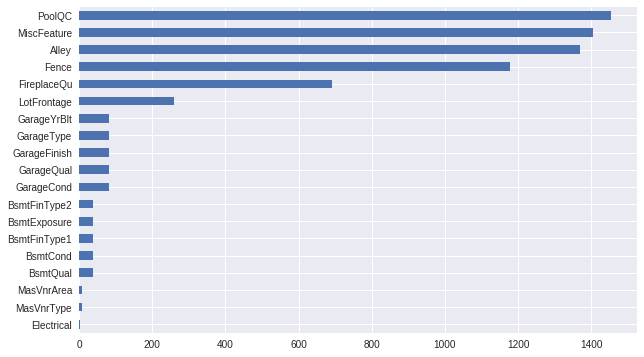

In [21]:
housing_data.isnull().sum()[housing_data.isnull().sum() > 0].sort_values().plot.barh(figsize=(10, 6))

In [22]:
na_cols = housing_data.isnull().sum()[housing_data.isnull().sum() > 0].index

In [23]:
na_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

|Feature | fill value|
|---|---|
|PoolQC | no pool |
|MiscFeature|no misc feature|
|Alley|no alley access|
|Fence|no fence|
|FireplaceQu|no fireplace|
|LotFrontage|fill with median, not normally distributed|
|GarageYrBlt|no garage... make categorical?|
|GarageType|no garage|
|GarageFinish|no garage|
|GarageQual|no garage|
|GarageCond|no garage|
|BsmtQual|no basement|
|BsmtCond|no basement|
|BsmtExposure|no basement|
|BsmtFinType1|no basement|
|BsmtFinType2|no basement|
|MasVnrArea|fill with 0... no masonry veneer|
|MasVnrType|No masonry veneer|
|Electrical|categorical... fill with unknown|



In [24]:
fill_with_no_feature_cols = [i for i in na_cols if i not in ['LotFrontage','GarageYrBlt','MasVnrArea']]

In [25]:
fill_with_no_feature_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Fill values where null means something.

In [26]:
housing_data['Alley'] = housing_data['Alley'].fillna('no_alley')
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('no_vnr')
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('no_bsmt')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('no_bsmt')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('no_bsmt')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('no_bsmt')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('no_bsmt')
housing_data['Electrical'] = housing_data['Electrical'].fillna('unknown')
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('no_fireplace')
housing_data['GarageType'] = housing_data['GarageType'].fillna('no_garage')
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('no_garage')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('no_garage')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('no_garage')
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('no_pool')
housing_data['Fence'] = housing_data['Fence'].fillna('no_fence')
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('no_misc_feat')

In [27]:
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median())
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)

Verify that you have *truly* eliminated all the null values!

In [28]:
housing_data.isnull().sum().sum()

0

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [29]:
housing_dummies = pd.get_dummies(housing_data)

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = housing_dummies.drop('SalePrice', axis=1)
y = housing_dummies['SalePrice']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I've edited up to here. 

Things to add: 

* Bias-variance tradeoff (Josh)
* Interpret coefficients (Josh)
* Business problems (Dave)

---

---

---

---

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [36]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [37]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 bajillion'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '20 bajillion'}
example_results.append(result_2)

Then we pass the results list to pass to a DataFrame.

In [38]:
pd.DataFrame(example_results)

dataset   name preprocessing         score
0   train  test1           raw   1 bajillion
1   train  test1        scaled  20 bajillion

This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [39]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [40]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [41]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

Look at this fancy, `fit_append` function I made. This adheres to the [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle.

In [42]:
def fit_append(name, preprocessing, model, X_train, X_test, y_train, y_test, results_list):

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    results_list.append({'name': name,
                         'model': model,
                         'dataset' : 'train',
                         'preprocessing': preprocessing,
                         'score': train_score})
    results_list.append({'name': name,
                         'model': model,
                         'dataset' : 'test',
                         'preprocessing': preprocessing,
                         'score': test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [43]:
benchmark_scaled = LinearRegression()
fit_append('benchmark', 'scaled', benchmark_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

Use a DataFrame to display your results.

In [44]:
pd.DataFrame(results)

dataset                                              model       name  \
0   train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
1    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
2   train  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
3    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   

  preprocessing         score  
0           raw  9.341906e-01  
1           raw  8.792119e-01  
2        scaled  9.341906e-01  
3        scaled -2.865144e+18

#### What are your observations? Add them to this markdown cell.

---

* The train score is better than the test score
* The raw test score is better than the scaled test score
* The raw and scaled train score are about the same

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [45]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [46]:
naive_ridge_raw = Ridge()
naive_ridge_scaled = Ridge()
naive_lasso_raw = Lasso()
naive_lasso_scaled = Lasso()
naive_elastic_raw = ElasticNet()
naive_elastic_scaled = ElasticNet()

In [47]:
fit_append('naive ridge', 'raw', naive_ridge_raw,
           X_train, X_test,
           y_train, y_test,
           results)

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

In [48]:
fit_append('naive lasso', 'raw', naive_lasso_raw,
           X_train, X_test,
           y_train, y_test,
           results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [49]:
fit_append('naive elasticnet', 'raw', naive_elastic_raw,
           X_train, X_test,
           y_train, y_test,
           results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
fit_append('naive ridge', 'scaled', naive_ridge_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

In [51]:
fit_append('naive lasso', 'scaled', naive_lasso_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [52]:
fit_append('naive elasticnet', 'scaled', naive_elastic_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [53]:
results_df = pd.DataFrame(results)

#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [54]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

dataset                                              model  \
1    test  LinearRegression(copy_X=True, fit_intercept=Tr...   
5    test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
7    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...   
9    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...   

               name preprocessing     score  
1         benchmark           raw  0.879212  
5       naive ridge           raw  0.884676  
7       naive lasso           raw  0.896226  
9  naive elasticnet           raw  0.853298

#### What are your observations? Add them to this markdown cell.

---

* Regularized models do better than the benchmark

#### Display just the scaled test results

In [55]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

dataset                                              model  \
3     test  LinearRegression(copy_X=True, fit_intercept=Tr...   
11    test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...   
13    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...   
15    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...   

                name preprocessing         score  
3          benchmark        scaled -2.865144e+18  
11       naive ridge        scaled  8.940682e-01  
13       naive lasso        scaled  8.941623e-01  
15  naive elasticnet        scaled  8.863925e-01

#### What are your observations? Add them to this markdown cell.

---



These are your benchmark results. You will refer to these for analysis during the next phase.

In [56]:
type(Ridge()) == Ridge

True

#### Display just the Benchmark models

In [57]:
results_df[(results_df.name.str.contains('benchmark')) & 
           (results_df.dataset == 'test')]

dataset                                              model       name  \
1    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   
3    test  LinearRegression(copy_X=True, fit_intercept=Tr...  benchmark   

  preprocessing         score  
1           raw  8.792119e-01  
3        scaled -2.865144e+18

#### Display just the Ridge models

In [58]:
results_df[(results_df.name.str.contains('ridge')) & 
           (results_df.dataset == 'test')]

dataset                                              model         name  \
5     test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  naive ridge   
11    test  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  naive ridge   

   preprocessing     score  
5            raw  0.884676  
11        scaled  0.894068

#### Display just the Lasso models

In [59]:
results_df[(results_df.name.str.contains('lasso')) & 
           (results_df.dataset == 'test')]

dataset                                              model         name  \
7     test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  naive lasso   
13    test  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  naive lasso   

   preprocessing     score  
7            raw  0.896226  
13        scaled  0.894162

#### Display just the Elasticnet models

In [60]:
results_df[(results_df.name.str.contains('elastic')) & 
           (results_df.dataset == 'test')]

dataset                                              model  \
9     test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...   
15    test  ElasticNet(alpha=1.0, copy_X=True, fit_interce...   

                name preprocessing     score  
9   naive elasticnet           raw  0.853298  
15  naive elasticnet        scaled  0.886392

#### What are your observations? Add them to this markdown cell.

---



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [61]:
def fit_append_cv(name, preprocessing, model, X_train, X_test, y_train, y_test, results_list):

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    results_list.append({'name': name,
                         'model': model,
                         'best_alpha': model.alpha_,
                         'dataset' : 'train',
                         'preprocessing': preprocessing,
                         'score': train_score})
    results_list.append({'name': name,
                         'model': model,
                         'best_alpha': model.alpha_,
                         'dataset' : 'test',
                         'preprocessing': preprocessing,
                         'score': test_score})

In [62]:
cv_results = list()

In [63]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [64]:
cross_validated_ridge = RidgeCV(alphas=np.logspace(-2,4,20))
cross_validated_lasso = LassoCV(alphas=np.logspace(-2,4,20))
cross_validated_elasticnet = ElasticNetCV(alphas=np.logspace(-2,4,20), l1_ratio=np.linspace(0,1,20))
cross_validated_ridge_scaled = RidgeCV(alphas=np.logspace(-2,4,20))
cross_validated_lasso_scaled = LassoCV(alphas=np.logspace(-2,4,20))
cross_validated_elasticnet_scaled = ElasticNetCV(alphas=np.logspace(-2,4,20), l1_ratio=np.linspace(0,1,20))

In [65]:
fit_append_cv('CV ridge', 'raw', 
           cross_validated_ridge,
           X_train, X_test,
           y_train, y_test,
           cv_results)

In [66]:
fit_append_cv('CV lasso', 'raw', 
           cross_validated_lasso,
           X_train, X_test,
           y_train, y_test,
           cv_results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [67]:
fit_append_cv('CV elasticnet', 'raw', 
           cross_validated_elasticnet,
           X_train, X_test,
           y_train, y_test,
           cv_results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [68]:
fit_append_cv('CV ridge', 'scaled', 
           cross_validated_ridge_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           cv_results)

In [69]:
fit_append_cv('CV lasso', 'scaled', 
           cross_validated_lasso_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           cv_results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [70]:
fit_append_cv('CV elasticnet', 'scaled', 
           cross_validated_elasticnet_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           cv_results)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [71]:
cv_results_df = pd.DataFrame(cv_results)

#### Display just the raw test results

In [72]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & 
           (cv_results_df.dataset == 'test')]

best_alpha dataset                                              model  \
1    6.951928    test  RidgeCV(alphas=array([  1.00000e-02,   2.06914...   
3  127.427499    test  LassoCV(alphas=array([  1.00000e-02,   2.06914...   
5  127.427499    test  ElasticNetCV(alphas=array([  1.00000e-02,   2....   

            name preprocessing     score  
1       CV ridge           raw  0.884856  
3       CV lasso           raw  0.904116  
5  CV elasticnet           raw  0.904116

#### Display just the scaled test results

In [73]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')].sort_values('score', ascending = False)

best_alpha dataset                                              model  \
9   1128.837892    test  LassoCV(alphas=array([  1.00000e-02,   2.06914...   
11  1128.837892    test  ElasticNetCV(alphas=array([  1.00000e-02,   2....   
7    545.559478    test  RidgeCV(alphas=array([  1.00000e-02,   2.06914...   

             name preprocessing     score  
9        CV lasso        scaled  0.902672  
11  CV elasticnet        scaled  0.902672  
7        CV ridge        scaled  0.886447



For each model...

* Instantiate and fit the model. If a cross-validated model exists (ex: `RidgeCV`), use it to tune your hyperparameters!
* Score the model with the built-in method (R2) on the train and test set
* generate predictions for that model
* if it's a regularized model, tune $\alpha$. Also try different `l1_ratio`s with your `ElasticNet`.
* visualize the coefficients of each model (`model.coef_`) using a bar plot. Make sure to include column names so you can see which feature the coefficient is for! (**HINT:** once you figure out how to do it, make a function!)

### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [74]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')].sort_values('score', ascending = False)

best_alpha dataset                                              model  \
9   1128.837892    test  LassoCV(alphas=array([  1.00000e-02,   2.06914...   
11  1128.837892    test  ElasticNetCV(alphas=array([  1.00000e-02,   2....   
7    545.559478    test  RidgeCV(alphas=array([  1.00000e-02,   2.06914...   

             name preprocessing     score  
9        CV lasso        scaled  0.902672  
11  CV elasticnet        scaled  0.902672  
7        CV ridge        scaled  0.886447

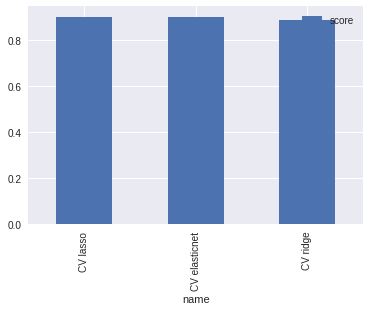

In [75]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')].sort_values('score', ascending = False)[['name','score']].plot.bar(x='name',y='score')

Regularized linear models performed relatively well on this dataset. Our top performer was `LassoCV` with a regularization strength of ~1128 and an $R^2$ of ~.884. **NOTE:** Depending on the random state of the train-test-split, you may see slightly different results, but a regularized model should be your best performer!

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

According to the Gauss-Markov theorem, the model fit by the Ordinary Least Squares is the least biased estimator of all possible estimators. In other words, it fits the data it has seen better than all possible models. It does not necessarily perform well, however, against data that it has not seen. A regularized model penalizes model complexity by limiting the size of the betas. The effect of this is that the model introduces more bias than the OLS model, but becomes more statistically stable and invariant. In other words, it is better able to generalize to new data. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.
* Interpret coefficients in terms of \$ value


In [76]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

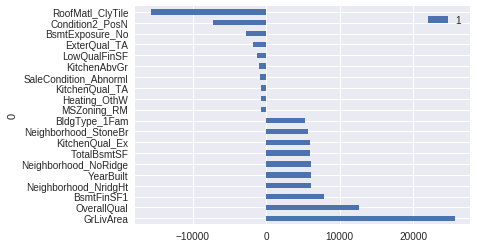

In [77]:
plot_coef(cross_validated_lasso_scaled)

#### Which features add / take away most value from a home?

Roofing a home with clay tile removes the most value. Interestingly, bening next to a park or other outdoor feature also reduces the value of the home. Alterenately, there are a few neighborhoods that increase the value. The most valuable feature in this case is `GrLivArea`. 